In [3]:
import  pandas_datareader
from datetime import date

code='510050.SS'
stock=pandas_datareader.get_data_yahoo(code,'2010-01-01',(date.today()))
stock.to_csv('.//data//'+code+'.csv')
# stock.to_csv('.//wjq_data//'+code+'.csv')
print("数据更新到:")
print(stock.tail(1))

数据更新到:
             High    Low  Open  Close       Volume  Adj Close
Date                                                         
2021-01-08  3.829  3.745  3.81  3.782  814331223.0      3.782


In [4]:
import pandas as pd 
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import svm,preprocessing
import matplotlib.pyplot as plt
import talib
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import accuracy_score


Bad key "text.kerning_factor" on line 4 in
D:\anaconda-py\anpy\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
Using TensorFlow backend.


### talib行情特征工程    启发于微矿的alpha158  

In [5]:
origDf=pd.read_csv('.\\data\\510050.SS.csv',encoding='gbk')
df=origDf[['Date','Close', 'High','Low','Open' ,'Volume']]
# 调用talib计算指数移动平均线的值
close = df['Close'].values  
open=df['Open'].values
high=df['High'].values
low=df['Low'].values
volume=df['Volume'].values
df['EMA12'] = talib.EMA(np.array(close), timeperiod=6)  
df['EMA26'] = talib.EMA(np.array(close), timeperiod=12)   
df['SAR']=talib.SAR(high, low, acceleration=0, maximum=0)
df['SMA']=talib.SMA(close, timeperiod=30)
df['MACD'],df['MACDsignal'],df['MACDhist'] = talib.MACD(np.array(close),
                            fastperiod=6, slowperiod=12, signalperiod=9) 
df['RSI']=talib.RSI(np.array(close), timeperiod=12)     #RSI的天数一般是6、12、24
df['MOM']=talib.MOM(np.array(close), timeperiod=5)
df['CDL2CROWS'] =talib.CDL2CROWS(open, high, low, close)
df['CDL3BLACKCROWS'] = talib.CDL3BLACKCROWS(open, high, low, close)
df['CDL3INSIDE'] = talib.CDL3INSIDE(open, high, low, close)
df['CDL3LINESTRIKE']= talib.CDL3LINESTRIKE(open, high, low, close)
df['CDLBREAKAWAY'] = talib.CDLBREAKAWAY(open, high, low, close)
df['CDLADVANCEBLOCK']=talib.CDLADVANCEBLOCK(open, high, low, close)
df['BETA']=talib.BETA(high, low, timeperiod=5)
df['CORREL'] = talib.CORREL(high, low, timeperiod=30)
df['AD'] = talib.AD(high, low, close, volume)
df['TSF']=talib.TSF(close, timeperiod=14)
df['CDLDARKCLOUDCOVER']=talib.CDLDARKCLOUDCOVER(open, high, low, close, penetration=0)
df['CDLDOJI']=talib.CDLDOJI(open, high, low, close)
df['CDLMORNINGDOJISTAR']=talib.CDLMORNINGDOJISTAR(open, high, low, close, penetration=0)
df['CDLMORNINGSTAR']=talib.CDLMORNINGSTAR(open, high, low, close, penetration=0)
df['CDLONNECK']=talib.CDLONNECK(open, high, low, close)
df['CDLPIERCING']=talib.CDLPIERCING(open, high, low, close)
df['CDLRICKSHAWMAN']=talib.CDLRICKSHAWMAN(open, high, low, close)
df['CDLRISEFALL3METHODS']=talib.CDLRISEFALL3METHODS(open, high, low, close)
df['CDLSEPARATINGLINES']=talib.CDLSEPARATINGLINES(open, high, low, close)
df['CDLSHOOTINGSTAR']=talib.CDLSHOOTINGSTAR(open, high, low, close)
df['CDLSHORTLINE']=talib.CDLSHORTLINE(open, high, low, close)
df['CDLSPINNINGTOP']=talib.CDLSPINNINGTOP(open, high, low, close)
df['CDLSTALLEDPATTERN']=talib.CDLSTALLEDPATTERN(open, high, low, close)
df['CDLUPSIDEGAP2CROWS']=talib.CDLUPSIDEGAP2CROWS(open, high, low, close)
df['CDLXSIDEGAP3METHODS']=talib.CDLXSIDEGAP3METHODS(open, high, low, close)
df['CDLUNIQUE3RIVER']=talib.CDLUNIQUE3RIVER(open, high, low, close)
df['ADOSC']=talib.ADOSC(high, low, close, volume, fastperiod=3, slowperiod=10)
df['OBV']=talib.OBV(close, volume)
df['CCI']=talib.CCI(high, low, close, timeperiod=14)
df['ROC']=talib.ROC(close, timeperiod=10)
df['ROCR']=talib.ROCR(close, timeperiod=10)
df['HT_DCPERIOD']=talib.HT_DCPERIOD(close)
df['ADXR']=talib.ADXR(np.array(high),np.array(low),np.array(close),timeperiod=14)
df['BOP']=talib.BOP(np.array(open),np.array(high),np.array(low),np.array(close))
df['CMO']=talib.CMO(np.array(close),timeperiod=14)
df ['DX']=talib.DX(np.array(high),np.array(low),np.array(close),timeperiod=14) #21
df ['MFI']=talib.MFI(np.array(high),np.array(low),np.array(close),np.array(volume),timeperiod=14)
df['MINUS_DI']=talib.MINUS_DI(np.array(high),np.array(low),np.array(close),timeperiod=14)
df ['NATR']=talib.NATR(np.array(high),np.array(low),np.array(close),timeperiod=14)
df ['PPO']=talib.PPO(np.array(close))
df ['T3']=talib.T3(np.array(close),timeperiod=5,vfactor=0.7) #30
df['TRIX']=talib.TRIX(np.array(close),timeperiod=30)
df['ULT']=talib.ULTOSC(np.array(high),np.array(low),np.array(close),timeperiod1=7,timeperiod2=14,timeperiod3=28)
df['upperband'],df['middleband'],df['lowerband']=talib.BBANDS(close, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
#diff列表示本日和明日收盘价的差
df['diff'] = df["Close"].shift(-1)-df['Close']
df['diff'].fillna(0, inplace = True)
#up列表示本日是否上涨,1表示涨，0表示跌
df['up'] = df['diff']   
df['up'][df['diff']>0] = 1
df['up'][df['diff']<=0] = 0
#预测值暂且初始化为0
df['predictForUp'] = 0
df.fillna(0, inplace = True)

D:\anaconda-py\anpy\lib\site-packages\ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\anaconda-py\anpy\lib\site-packages\ipykernel_launcher.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### 线性回归预测明日股票收盘价


0.09259259259259259
0.5094339622641509


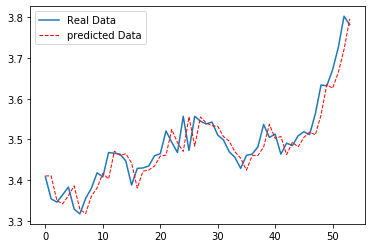

线性拟合的mse 0.03824829258286118
线性拟合的r2 0.8554218017277122


In [6]:
featureData=df[['Open','High','Volume','Low','Close','MACD','MACDhist','MACDsignal','RSI','MOM','EMA12','EMA26']]
#划分特征值和目标值
feature=featureData.values
target=np.array(df['Close'].shift(-1).dropna())
#设定训练集和测试集
sum_size=len(target)
pridectedDays=int(math.ceil(0.02*len(df)))
train_size=sum_size-pridectedDays
feature_train=feature[0:train_size]
target_train=target[0:train_size]
feature_test=feature[train_size:sum_size]
target_test=target[train_size:sum_size]
myclose=df['Close'].values
close_test=myclose[sum_size-pridectedDays:sum_size]

lrTool=LinearRegression()
lrTool.fit(feature_train,target_train)#训练
#测试机预测结果
predictByTest=lrTool.predict(feature_test)

sum1=0
tmp=np.zeros(len(predictByTest)-1)
for i in range(len(predictByTest)):
    if((predictByTest[i]-target_test[i])/target_test[i]>0.01):
            sum1+=1
    if i!=0:
        tmp[i-1]=((predictByTest[i]-predictByTest[i-1])*(target_test[i]-target_test[i-1])>0);
print(sum1/len(predictByTest))
print(np.sum(tmp)/len(tmp))
x=range(pridectedDays)
plt.figure()
plt.plot(x,target_test,label='Real Data')
plt.plot(x,predictByTest,color='red',linewidth=1,linestyle='--',label='predicted Data')
plt.legend(loc='best')

plt.show()
#mean_squared_error(y_true, y_pred) #均方误差回归损失,越小越好。
mse = np.sqrt(mean_squared_error(target_test, predictByTest))
print('线性拟合的mse',mse)
# r2 范围[0，1]，R2越接近1拟合越好。
r2 = r2_score(target_test, predictByTest)
print('线性拟合的r2',r2)

### SVM预测股票涨跌

In [7]:
target = df['up']
length=len(df)
trainNum=int(length*0.998)
predictNum=length-trainNum
#选择指定列作为特征列'
feature=df[['Close', 'High', 'Low','Open' ,'Volume','MACD','EMA12','CDLBREAKAWAY','CDLADVANCEBLOCK','ADXR','CDLDARKCLOUDCOVER'
,'CDLDOJI','CDLMORNINGDOJISTAR','CDLMORNINGSTAR','CDLONNECK','CDLPIERCING','CDLRICKSHAWMAN','CDLRISEFALL3METHODS','CDLSEPARATINGLINES'
,'CDLUPSIDEGAP2CROWS','CDLUNIQUE3RIVER']]
#标准化处理特征值
# feature=preprocessing.scale(feature)
stand_means = preprocessing.StandardScaler()
feature = stand_means.fit_transform(feature)
# Y_trans = stand_means.transform(feature.loc[4:8,:])
# TT=stand_means.transform(feature.loc[4:6,:])
#训练集的特征值和目标值
featureTrain=feature[0:trainNum]
targetTrain=target[0:trainNum]
featureTest=feature[trainNum:length]
targetTest=target[trainNum:length]
#目标值是真实的涨跌情况
svmTool = svm.SVC(kernel='rbf')
svmTool.fit(featureTrain,targetTrain)
svm_predict=svmTool.predict(featureTest)
#预测完毕

In [8]:
predictedIndex=trainNum
#逐行预测测试集
while predictedIndex<length:
    testFeature=feature[predictedIndex:predictedIndex+1]            
    predictForUp=svmTool.predict(testFeature)    
    df.loc[predictedIndex,'predictForUp']=predictForUp    
    predictedIndex = predictedIndex+1
#该对象只包含预测数据，即只包含测试集
dfWithPredicted = df[trainNum:length]

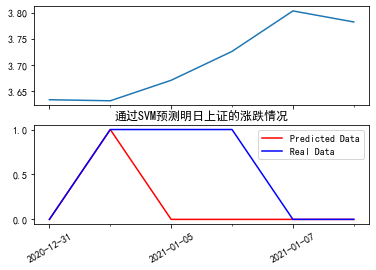

In [9]:
#开始绘图，创建两个子图
figure = plt.figure()
#创建子图     
(axClose, axUpOrDown) = figure.subplots(2, sharex=True)
dfWithPredicted['Close'].plot(ax=axClose)
dfWithPredicted['predictForUp'].plot(ax=axUpOrDown,color="red", label='Predicted Data')
dfWithPredicted['up'].plot(ax=axUpOrDown,color="blue",label='Real Data')
plt.legend(loc='best') #绘制图例
#设置x轴坐标标签和旋转角度
major_index=dfWithPredicted.index[dfWithPredicted.index%2==0]
major_xtics=dfWithPredicted['Date'][dfWithPredicted.index%2==0]
plt.xticks(major_index,major_xtics)
plt.setp(plt.gca().get_xticklabels(), rotation=30) 
plt.title("通过SVM预测明日上证的涨跌情况")
plt.rcParams['font.sans-serif']=['SimHei']
plt.show()


In [10]:
y_predict=dfWithPredicted['predictForUp'].values
print("SVM预测结果是",y_predict[-1])
print('SVM准确率',svmTool.score(featureTest, targetTest))
print('SVM精确率',precision_score(targetTest, y_predict,  average='macro'))
print('SVM召回率',recall_score(targetTest, y_predict,  average='macro'))
print('F1',f1_score(targetTest, y_predict,  average='macro'))


SVM预测结果是 0.0
SVM准确率 0.6666666666666666
SVM精确率 0.8
SVM召回率 0.6666666666666666
F1 0.625


### 逻辑回归预测股票涨跌

In [11]:
length=len(df)
trainNum=int(length*0.998)
feature=df.drop(['Date','diff','up','predictForUp'],1)
#标准化处理特征值
# print('选取特征前的特征数量:',feature.columns.shape)
stand_means = preprocessing.StandardScaler()
feature = stand_means.fit_transform(feature)
#划分训练集和测试机
featureTrain=feature[0:trainNum]
targetTrain=target[0:trainNum]
featureTest=feature[trainNum:length]
targetTest=target[trainNum:length]
logistic=LogisticRegression()
logistic.fit(featureTrain,targetTrain)
model = SelectFromModel(logistic, prefit=True)
feature=model.transform(feature)
featureTrain=feature[0:trainNum]
featureTest=feature[trainNum:length]
logistic.fit(featureTrain,targetTrain)
#logistics结果
logistic_predict=logistic.predict(featureTest)
# print('选取特征后的特征数量:',feature.shape[1])

D:\anaconda-py\anpy\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\anaconda-py\anpy\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  

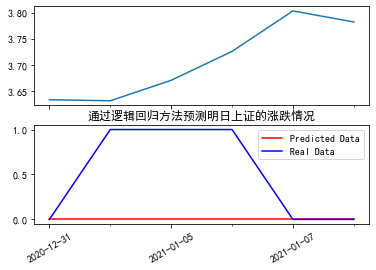

In [12]:
predictedIndex=trainNum
#逐行预测测试集
while predictedIndex<length:
    testFeature=feature[predictedIndex:predictedIndex+1]            
    predictForUp=logistic.predict(testFeature)    
    df.loc[predictedIndex,'predictForUp']=predictForUp    
    predictedIndex = predictedIndex+1
#该对象只包含预测数据，即只包含测试集
dfWithPredicted = df[trainNum:length]
#开始绘图，创建两个子图
figure = plt.figure()
#创建子图     
(axClose, axUpOrDown) = figure.subplots(2, sharex=True)
dfWithPredicted['Close'].plot(ax=axClose)
dfWithPredicted['predictForUp'].plot(ax=axUpOrDown,color="red", label='Predicted Data')
dfWithPredicted['up'].plot(ax=axUpOrDown,color="blue",label='Real Data')
plt.legend(loc='best') #绘制图例
#设置x轴坐标标签和旋转角度
major_index=dfWithPredicted.index[dfWithPredicted.index%2==0]
major_xtics=dfWithPredicted['Date'][dfWithPredicted.index%2==0]
plt.xticks(major_index,major_xtics)
plt.setp(plt.gca().get_xticklabels(), rotation=30) 
plt.title("通过逻辑回归方法预测明日上证的涨跌情况")
plt.rcParams['font.sans-serif']=['SimHei']
plt.show()


In [13]:
y_predict=logistic_predict
print("逻辑回归预测结果是",y_predict[-1])
print('逻辑回归准确率',logistic.score(featureTest, targetTest))
print('逻辑回归精确率',precision_score(targetTest, y_predict,  average='macro'))
print('逻辑回归召回率',recall_score(targetTest, y_predict,  average='macro'))
print('F1',f1_score(targetTest, y_predict,  average='macro'))

逻辑回归预测结果是 0.0
逻辑回归准确率 0.5
逻辑回归精确率 0.25
逻辑回归召回率 0.5
F1 0.3333333333333333


D:\anaconda-py\anpy\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 随机森林

In [53]:
#目标值是真实的涨跌情况
target = df['up']
length=len(df)
trainNum=int(length-2)
#选择指定列作为特征列'
feature=df[['Close', 'High', 'Low', 'Open', 'Volume', 'EMA12', 'EMA26',
            'SMA', 'MACD', 'MACDsignal', 'MACDhist', 'RSI', 'MOM', 'BETA',
            'AD', 'ADOSC', 'CCI', 'ROCR', 'ADXR', 'CMO', 'MFI', 'NATR', 'T3',
            'ULT', 'middleband']]

#训练集的特征值和目标值
featureTrain=feature[0:trainNum]
targetTrain=target[0:trainNum]
featureTest=feature[trainNum:length]
targetTest=target[trainNum:length]


rfc = RandomForestClassifier(max_features=4,random_state=0)
rfc.fit(featureTrain, targetTrain)
rfc_predict= rfc.predict(featureTest)
y_predict =rfc_predict
print("随机森林预测结果是",y_predict[-1])
print('随机森林准确率',rfc.score(featureTest, targetTest))
print('随机森林精确率',precision_score(targetTest, y_predict,  average='macro'))
print('随机森林召回率',recall_score(targetTest, y_predict,  average='macro'))
print('F1',f1_score(targetTest, y_predict,  average='macro'))

随机森林预测结果是 0.0
随机森林准确率 0.5925925925925926
随机森林精确率 0.5916666666666667
随机森林召回率 0.5906593406593407
F1 0.5903448275862069


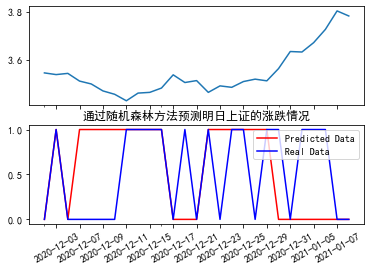

In [25]:
predictedIndex=trainNum
#逐行预测测试集
while predictedIndex<length:
    testFeature=feature[predictedIndex:predictedIndex+1]            
    predictForUp=rfc.predict(testFeature)    
    df.loc[predictedIndex,'predictForUp']=predictForUp    
    predictedIndex = predictedIndex+1
#该对象只包含预测数据，即只包含测试集
dfWithPredicted = df[trainNum:length]
#开始绘图，创建两个子图
figure = plt.figure()
#创建子图     
(axClose, axUpOrDown) = figure.subplots(2, sharex=True)
dfWithPredicted['Close'].plot(ax=axClose)
dfWithPredicted['predictForUp'].plot(ax=axUpOrDown,color="red", label='Predicted Data')
dfWithPredicted['up'].plot(ax=axUpOrDown,color="blue",label='Real Data')
plt.legend(loc='best') #绘制图例
#设置x轴坐标标签和旋转角度
major_index=dfWithPredicted.index[dfWithPredicted.index%2==0]
major_xtics=dfWithPredicted['Date'][dfWithPredicted.index%2==0]
plt.xticks(major_index,major_xtics)
plt.setp(plt.gca().get_xticklabels(), rotation=30) 
plt.title("通过随机森林方法预测明日上证的涨跌情况")
plt.rcParams['font.sans-serif']=['SimHei']
plt.show()

### LSTM预测并不好



In [16]:
# 获取训练集，，即是前多少行数据
def get_train_data(data,time_step=30, train_begin=0, train_end=2600):#函数传值，
    data_train = data[train_begin:train_end]#训练数据开始至结束
    train_x, train_y = [], []  # 训练集
    for i in range(len(data_train) - time_step):#以下即是获取训练集并进行标准化，并返回该函数的返回值
        x = data_train[i:i + time_step,:]#输入维度数据
        y = data_train[i+time_step,-1]#最后一列标签为Y，可以说出是要预测的，并与之比较，反向求参
        train_x.append(x.tolist())
        train_y.append(y.tolist())
    return np.array(train_x), np.array(train_y)


In [42]:
data=df[['High', 'Low','Open' ,'Volume','ADXR', 'OBV','RSI' ,'MACDhist' ,'CCI','BOP',
         'CMO','DX','MFI','MINUS_DI','NATR','PPO','TRIX','Close']]
# 'trix', 'mfi', 'ULT', 'adxr', 'adx', 'minus_di', 'ppo', 'dx', 'cmo', 'MACDhist', 'roc', 'natr', 'cci', 'bop',
#标准化处理特征值
#获取DataFrame中的数据，形式为数组array形式
# 特征的归一化处理
scaler =preprocessing.MinMaxScaler(feature_range=(0, 1))
length=len(data)
data = scaler.fit_transform(data)
time_step=8
feanum=data.shape[1]
feature,target=get_train_data(data,time_step,0,length)
length=len(feature)
trainNum=int(length*0.99)
predictNum=length-trainNum
# hot标签
# target=pd.get_dummies(df['up']).values
featureTrain=feature[0:trainNum]
featureTest=feature[trainNum:length]
targetTrain=target[0: trainNum]
targetTest=target[trainNum:length]
print(featureTest.shape)
print(featureTrain.shape)
print(targetTest.shape)
print(targetTrain.shape)

(27, 8, 18)
(2637, 8, 18)
(27,)
(2637,)


In [43]:
d = 0.001
lstmTool = Sequential()#建立层次模型
lstmTool.add(LSTM(20, input_shape=(time_step, feanum), return_sequences=True))#建立LSTM层
lstmTool.add(Dropout(d))#建立的遗忘层
lstmTool.add(LSTM(4, input_shape=(time_step, feanum), return_sequences=False))#建立LSTM层
lstmTool.add(Dropout(d))#建立的遗忘层
lstmTool.add(Dense(4,init='uniform',activation='relu'))   #建立全连接层     
lstmTool.add(Dense(1,init='uniform',activation='relu'))
lstmTool.compile(loss='mse',optimizer='adam')
lstmTool.fit(featureTrain, targetTrain, nb_epoch =50, batch_size = 64) #训练模型nb_epoch次
print(lstmTool.summary())

D:\anaconda-py\anpy\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, activation="relu", kernel_initializer="uniform")`
  import sys
D:\anaconda-py\anpy\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="relu", kernel_initializer="uniform")`
  


Epoch 1/50
2637/2637 [==============================] - 4s 1ms/step - loss: 0.1510
Epoch 2/50
2637/2637 [==============================] - 1s 501us/step - loss: 0.0825
Epoch 3/50
2637/2637 [==============================] - 1s 507us/step - loss: 0.0442
Epoch 4/50
2637/2637 [==============================] - 1s 507us/step - loss: 0.0143
Epoch 5/50
2637/2637 [==============================] - 1s 504us/step - loss: 0.0037
Epoch 6/50
2637/2637 [==============================] - 1s 505us/step - loss: 0.0019
Epoch 7/50
2637/2637 [==============================] - 1s 506us/step - loss: 0.0014
Epoch 8/50
2637/2637 [==============================] - 1s 488us/step - loss: 0.0011
Epoch 9/50
2637/2637 [==============================] - 1s 495us/step - loss: 9.6981e-04
Epoch 10/50
2637/2637 [==============================] - 1s 495us/step - loss: 8.6846e-04
Epoch 11/50
2637/2637 [==============================] - 1s 491us/step - loss: 9.2168e-04
Epoch 12/50
2637/2637 [==============================

D:\anaconda-py\anpy\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Train Data')

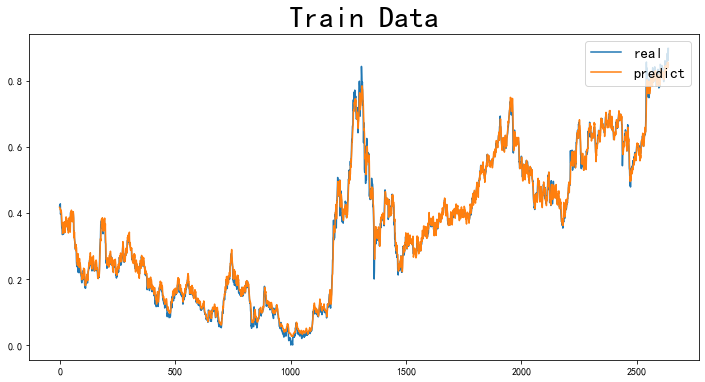

In [44]:
y_train_predict=lstmTool.predict(featureTrain)[:,0]
y_train=targetTrain
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[:,0].plot(figsize=(12,6))
draw.iloc[:,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Train Data",fontsize='30') #添加标题
#展示在训练集上的表现

Text(0.5, 1.0, 'Test Data')

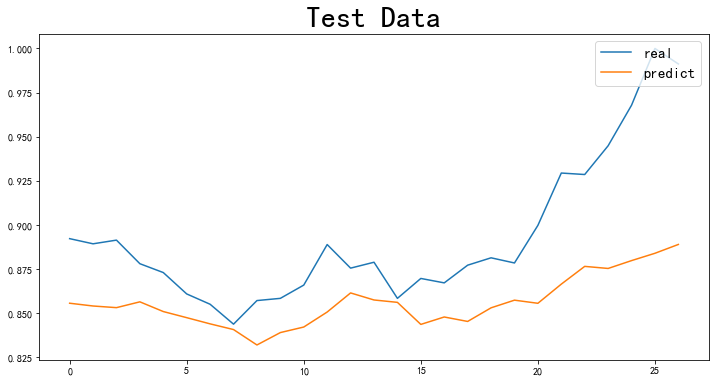

In [45]:
y_test_predict=lstmTool.predict(featureTest)[:,0]
y_test=targetTest
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
draw.iloc[:,0].plot(figsize=(12,6))
draw.iloc[:,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30') #添加标题
#展示在测试集上的表现

In [51]:
#输出结果
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
print('训练集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_train_predict, y_train))
print(mean_squared_error(y_train_predict, y_train) )
print(mape(y_train_predict, y_train) )
print('测试集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_test_predict, y_test))
print(mean_squared_error(y_test_predict, y_test) )
print(mape(y_test_predict, y_test) )


训练集上的MAE/MSE/MAPE
0.012239172847171825
0.0002925835782885384
5.494535638463007
测试集上的MAE/MSE/MAPE
0.03655621004367873
0.002126598619771071
4.227157213490643


### xgboost预测

In [71]:

feature=df[['Close', 'High', 'Low', 'Open', 'Volume', 'EMA12', 'EMA26', 'SMA',
       'MACD', 'MACDhist', 'RSI', 'MOM', 'BETA', 'CORREL', 'AD', 'TSF',
       'CDLDOJI', 'CDLRICKSHAWMAN', 'CDLSHORTLINE', 'CDLSPINNINGTOP', 'ADOSC',
       'OBV', 'CCI', 'ROC', 'ROCR', 'HT_DCPERIOD', 'ADXR', 'BOP', 'CMO', 'DX',
       'MFI', 'MINUS_DI', 'NATR', 'PPO', 'T3', 'TRIX', 'ULT', 'upperband',
       'middleband', 'lowerband']]
length=len(feature)
target = df['up']
trainNum=int(length-3)
featureTrain=feature[0:trainNum]
targetTrain=target[0:trainNum]
featureTest=feature[trainNum:length]
targetTest=target[trainNum:length]
xgbTool = xgb.XGBClassifier(objective='binary:logistic',max_depth=6,min_child_weight= 1,n_estimators=100)
xgbTool.fit(featureTrain, targetTrain,verbose=True)
# 进行预测
xgb_predict = xgbTool.predict(featureTest)
xgb_predict = [round(value) for value in xgb_predict]
y_predict=(xgb_predict)

D:\anaconda-py\anpy\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:12:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [72]:
print("Xgboost预测结果是",y_predict[-1])
print('Xgboost准确率',xgbTool.score(featureTest, targetTest))
print('Xgboost精确率',precision_score(targetTest, y_predict,  average='macro'))
print('Xgboost召回率',recall_score(targetTest, y_predict,  average='macro'))
print('F1',f1_score(targetTest, y_predict,  average='macro'))

Xgboost预测结果是 1
Xgboost准确率 0.6666666666666666
Xgboost精确率 0.75
Xgboost召回率 0.75
F1 0.6666666666666666


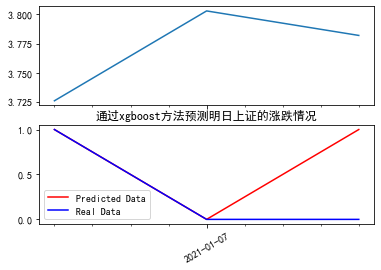

In [73]:
predictedIndex=trainNum
#逐行预测测试集
while predictedIndex<length:
    testFeature=feature[predictedIndex:predictedIndex+1]            
    predictForUp=xgbTool.predict(testFeature)    
    df.loc[predictedIndex,'predictForUp']=predictForUp    
    predictedIndex = predictedIndex+1
#该对象只包含预测数据，即只包含测试集
dfWithPredicted = df[trainNum:length]
#开始绘图，创建两个子图
figure = plt.figure()
#创建子图     
(axClose, axUpOrDown) = figure.subplots(2, sharex=True)
dfWithPredicted['Close'].plot(ax=axClose)
dfWithPredicted['predictForUp'].plot(ax=axUpOrDown,color="red", label='Predicted Data')
dfWithPredicted['up'].plot(ax=axUpOrDown,color="blue",label='Real Data')
plt.legend(loc='best') #绘制图例
#设置x轴坐标标签和旋转角度
major_index=dfWithPredicted.index[dfWithPredicted.index%2==0]
major_xtics=dfWithPredicted['Date'][dfWithPredicted.index%2==0]
plt.xticks(major_index,major_xtics)
plt.setp(plt.gca().get_xticklabels(), rotation=30) 
plt.title("通过xgboost方法预测明日上证的涨跌情况")
plt.rcParams['font.sans-serif']=['SimHei']
plt.show()

## 最终综合结果:

In [74]:
print("svm预测结果",svm_predict[-1])
print("逻辑回归预测结果",logistic_predict[-1])
print("随机森林预测结果",rfc_predict[-1])
print("xgboost预测结果",xgb_predict[-1])
final_result=0.2*svm_predict[-1]+0.2*logistic_predict[-1]+0.3*rfc_predict[-1]+0.3*xgb_predict[-1]
if(final_result>=0.5):
    print("最终预测结果是:涨")
else:
    print("最终预测结果是:跌")

svm预测结果 0.0
逻辑回归预测结果 0.0
随机森林预测结果 0.0
xgboost预测结果 1
最终预测结果是:跌


### 一些画图过程  去掉注释可以查看

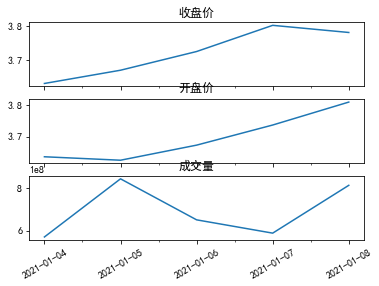

In [35]:
# figure = plt.figure()
# (a, b,c) = figure.subplots(3, sharex=True)
# df['Close'].tail().plot(ax=a,title='收盘价')
# df['Open'].tail().plot(ax=b,title='开盘价')
# df['Volume'].tail().plot(ax=c,title='成交量')
# plt.xticks(df['Close'].tail().index,df['Date'].tail())
# plt.setp(plt.gca().get_xticklabels(), rotation=30) 
# plt.show()

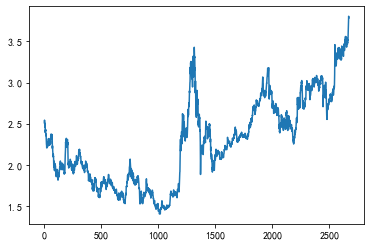

In [36]:
# df['Close'].plot()
# plt.show()

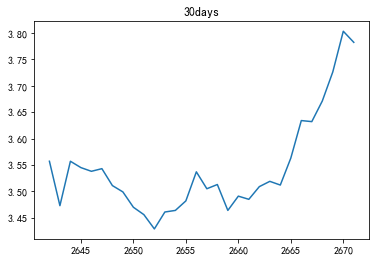

In [37]:
# df['Close'].tail(30).plot(title='30days')
# plt.show()

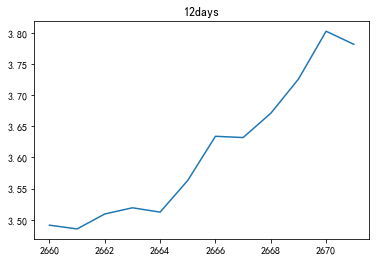

In [38]:
# df['Close'].tail(12).plot(title='12days')
# plt.show()

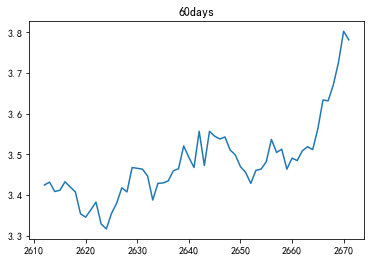

In [39]:
# df['Close'].tail(60).plot(title='60days')
# plt.show()